https://oauth.vk.com/authorize?client_id=6121396&scope=1&redirect_uri=https://oauth.vk.com/blank.html&display=page&response_type=token&revoke=1

In [71]:
!pip install vk vk_api scipy networkx tqdm requests numpy matplotlib pandas

  Using cached pandas-2.1.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.7 MB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.5/502.5 kB 6.1 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


# Task 1

In [1]:
import time
import random
from datetime import datetime
from collections import Counter

import vk, vk_api
import requests
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

In [2]:
access_token = ''
vk_session = vk_api.VkApi(token = access_token)
vk = vk_session.get_api()

In [3]:
users = vk.users.get(user_id = 428900901, fields='id,about,bdate,city,country,followers_count')
users

[{'id': 428900901,
  'bdate': '20.8.2003',
  'about': '',
  'followers_count': 678,
  'first_name': 'Lev',
  'last_name': 'Novitskiy',
  'can_access_closed': True,
  'is_closed': False}]

# Task 2

## Find my friends

In [24]:
def get_friends(token, user_id, with_name = False):
    fields = 'first_name,last_name,country,city' if with_name else ''
    url = 'https://api.vk.com/method/friends.get?' + \
                        'access_token={}&user_id={}&fields={}&v=5.81'.format(token,user_id, fields)
    response = requests.get(url).json()
    if response.get('error'):
        print(response.get('error'))
        return []
        
    return response.get('response').get('items')

In [25]:
CENTRAL_USER_ID = 428900901

In [26]:
central_users = get_friends(access_token, CENTRAL_USER_ID, with_name=True)
central_users = {user_dict['id']: user_dict.get('first_name') + \
                ' ' + user_dict.get('last_name') for user_dict in central_users}

central_users[CENTRAL_USER_ID] = 'Я'
central_users

{474878: 'Алексей Богданович',
 3029876: 'Аня Белоногова',
 6303474: 'Александр Ваганов',
 8148016: 'Ксюша Ситникова',
 8345848: 'Зоя Соболева-Билибина',
 11788027: 'Виктор Науменко',
 12388370: 'Анна Персикова',
 13449215: 'Антон Глупак',
 13840307: 'Светлана Титкова',
 15873662: 'Ирина Зеленская',
 27445941: 'Алина Лазарева',
 27947210: 'Игорь Чеботарев',
 35693320: 'Светлана Светличная',
 37310508: 'Антон Чопич',
 38221110: 'Алексей Малков',
 38524338: 'Иван Соколовский',
 46285231: 'Александра Сластен',
 49040357: 'Даниил Ефимов',
 57165539: 'Royal Novruzov',
 70489738: 'DELETED ',
 74313568: 'Валерия Шевчук-Крылова',
 75852330: 'Артём Солоухин',
 79436117: 'Александр Белых',
 82421128: 'Максим Мацегора',
 83008701: 'Женёк Гуров',
 91645598: 'Динара Ситдекова',
 96525483: 'Victor Linev',
 96918353: 'Кэтти Омельченко',
 100548161: 'Danil Kalganov',
 101180492: 'Александр Борискин',
 105325204: 'Иоанн Бардак',
 108375463: 'Янина Зайцева',
 111185445: 'Денис Переладов',
 113355723: 'M

## Build friends graph

## Я оставлю 300 друзей, потому что все юзеры будут долго обрабатываться

In [11]:
n = 300
sampled_users = list(central_users.keys())[:300]

In [10]:
graph = {}

for user_id in tqdm(sampled_users):
    graph[user_id] = get_friends(access_token, user_id)
    time.sleep(random.randint(1, 10) / 1000)

graph

  0%|          | 0/300 [00:00<?, ?it/s]

{'error_code': 18, 'error_msg': 'User was deleted or banned', 'request_params': [{'key': 'user_id', 'value': '38221110'}, {'key': 'fields', 'value': ''}, {'key': 'v', 'value': '5.81'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 18, 'error_msg': 'User was deleted or banned', 'request_params': [{'key': 'user_id', 'value': '70489738'}, {'key': 'fields', 'value': ''}, {'key': 'v', 'value': '5.81'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 18, 'error_msg': 'User was deleted or banned', 'request_params': [{'key': 'user_id', 'value': '152321312'}, {'key': 'fields', 'value': ''}, {'key': 'v', 'value': '5.81'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
{'error_code': 18, 'error_msg': 'User was deleted or banned', 'request_params': [{'key': 'user_id', 'value': '211645961'}, {'key': 'fields', 'value': ''}, {'key': 'v', 'value': '5.81'}, {'key': 'method', 'value': 'fr

{474878: [64388,
  80568,
  149446,
  523814,
  1087536,
  1908809,
  2570402,
  3029876,
  3380256,
  3449511,
  4157387,
  4587299,
  4710679,
  5682248,
  6247919,
  9643114,
  10921080,
  13449215,
  17377207,
  20663899,
  21553320,
  23402237,
  25089169,
  38442322,
  49014829,
  51802136,
  64770340,
  65613584,
  78651445,
  83746780,
  91085324,
  92670746,
  147302299,
  155151351,
  171626611,
  176927399,
  177610887,
  192714221,
  193520291,
  199210381,
  209081917,
  212665989,
  235458670,
  241011926,
  246199706,
  248356655,
  252592007,
  257184306,
  260425083,
  261518990,
  265435051,
  272350139,
  274166478,
  280556606,
  287222908,
  295456386,
  302525212,
  306707539,
  309568249,
  318321773,
  321086469,
  328210948,
  331574445,
  332831095,
  342565920,
  345189744,
  350974158,
  358837857,
  367002638,
  369403506,
  370224797,
  373848391,
  374512054,
  376929504,
  378552815,
  378846320,
  384603190,
  386024968,
  389993052,
  394949381,
  4170

In [12]:
uniqie_users = set(graph.keys())
uniqie_users

{474878,
 3029876,
 6303474,
 8148016,
 8345848,
 11788027,
 12388370,
 13449215,
 13840307,
 15873662,
 27445941,
 27947210,
 35693320,
 37310508,
 38221110,
 38524338,
 46285231,
 49040357,
 57165539,
 70489738,
 74313568,
 75852330,
 79436117,
 82421128,
 83008701,
 91645598,
 96525483,
 96918353,
 100548161,
 101180492,
 105325204,
 108375463,
 111185445,
 113355723,
 117059706,
 117987104,
 125560335,
 126273058,
 132732873,
 135805708,
 137346763,
 137557627,
 138363794,
 142483071,
 142669456,
 143060784,
 143821542,
 147149778,
 147302299,
 148496216,
 149982218,
 150810764,
 151525785,
 151541010,
 151686441,
 152321312,
 152337868,
 152469188,
 152870880,
 153126336,
 153469049,
 155064235,
 155800575,
 159760140,
 160359526,
 162026045,
 162522405,
 162815190,
 163952451,
 164456079,
 164516885,
 164731734,
 164974100,
 164995635,
 165825255,
 166752314,
 170790194,
 171347646,
 172744057,
 175060640,
 175135261,
 175560732,
 175723642,
 177610887,
 177647191,
 177713318,
 1

In [13]:
for users_friends in graph.values():
    uniqie_users.update(users_friends)
    
users_friends

[551804,
 1672261,
 2241447,
 2503356,
 2674743,
 8586266,
 11788027,
 18047854,
 18122547,
 20327148,
 21413525,
 23086840,
 24168491,
 24428311,
 25071282,
 27947210,
 29342671,
 30336461,
 31987091,
 32400930,
 32896908,
 34886765,
 36436694,
 37849233,
 38988205,
 40548534,
 40804630,
 42086300,
 42311867,
 43342075,
 45122290,
 46184594,
 49528867,
 49835124,
 51343070,
 55559146,
 55801514,
 57265721,
 63095122,
 63170435,
 67398519,
 69082659,
 69089865,
 70651406,
 71263084,
 73120659,
 73302747,
 73361264,
 76129929,
 76831546,
 77157076,
 78465246,
 78702569,
 79687003,
 80596406,
 81427734,
 82306691,
 83388724,
 85150619,
 85404261,
 86789851,
 88606595,
 89619297,
 92077504,
 95261203,
 95339064,
 96002581,
 96109388,
 96205934,
 96343074,
 98606778,
 98927098,
 99386166,
 102336682,
 103195356,
 105585188,
 106661239,
 106969609,
 107293720,
 110078791,
 110604768,
 113996818,
 114723393,
 114985130,
 118644082,
 120238037,
 121037802,
 121190952,
 121840954,
 124516837,


In [14]:
g = nx.Graph()

for user_id, user_friends in graph.items():
    g.add_node(central_users[user_id])
    for friends_id in user_friends:
        if friends_id in central_users:
            g.add_edge(central_users[user_id], central_users[friends_id])

/Users/user/PycharmProjects/university-data-analysis/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12420 (\N{HIRAGANA LETTER YA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/user/PycharmProjects/university-data-analysis/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12429 (\N{HIRAGANA LETTER RO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/user/PycharmProjects/university-data-analysis/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12394 (\N{HIRAGANA LETTER NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/user/PycharmProjects/university-data-analysis/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12374 (\N{HIRAGANA LETTER ZA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/user/PycharmProjects/university-data-analysis

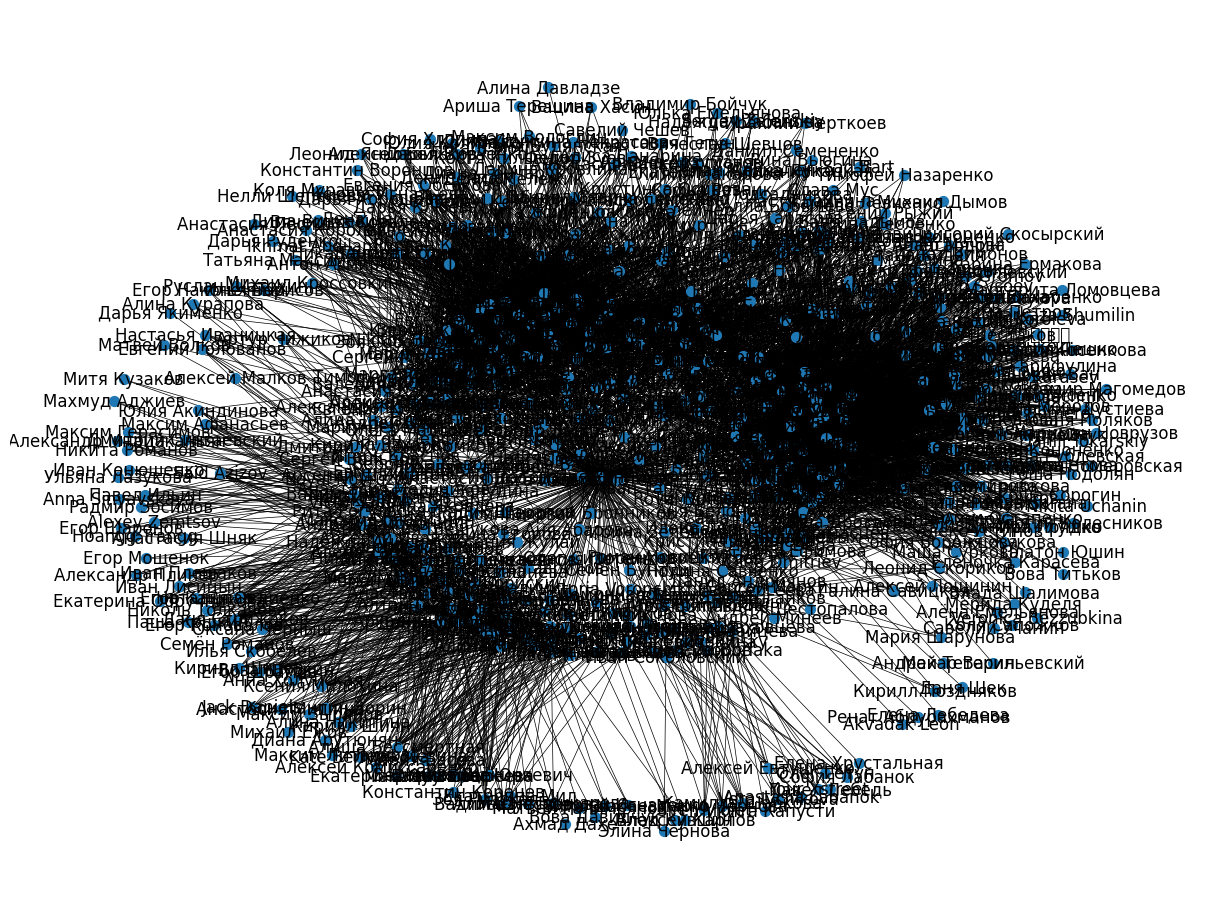

In [15]:
def graph_plot():
    plt.figure(figsize=(12, 9))
    nx.draw_kamada_kawai(g, with_labels=True, node_size=50, width=0.5)
    plt.show()

graph_plot()

In [16]:
g.remove_node(central_users[CENTRAL_USER_ID])

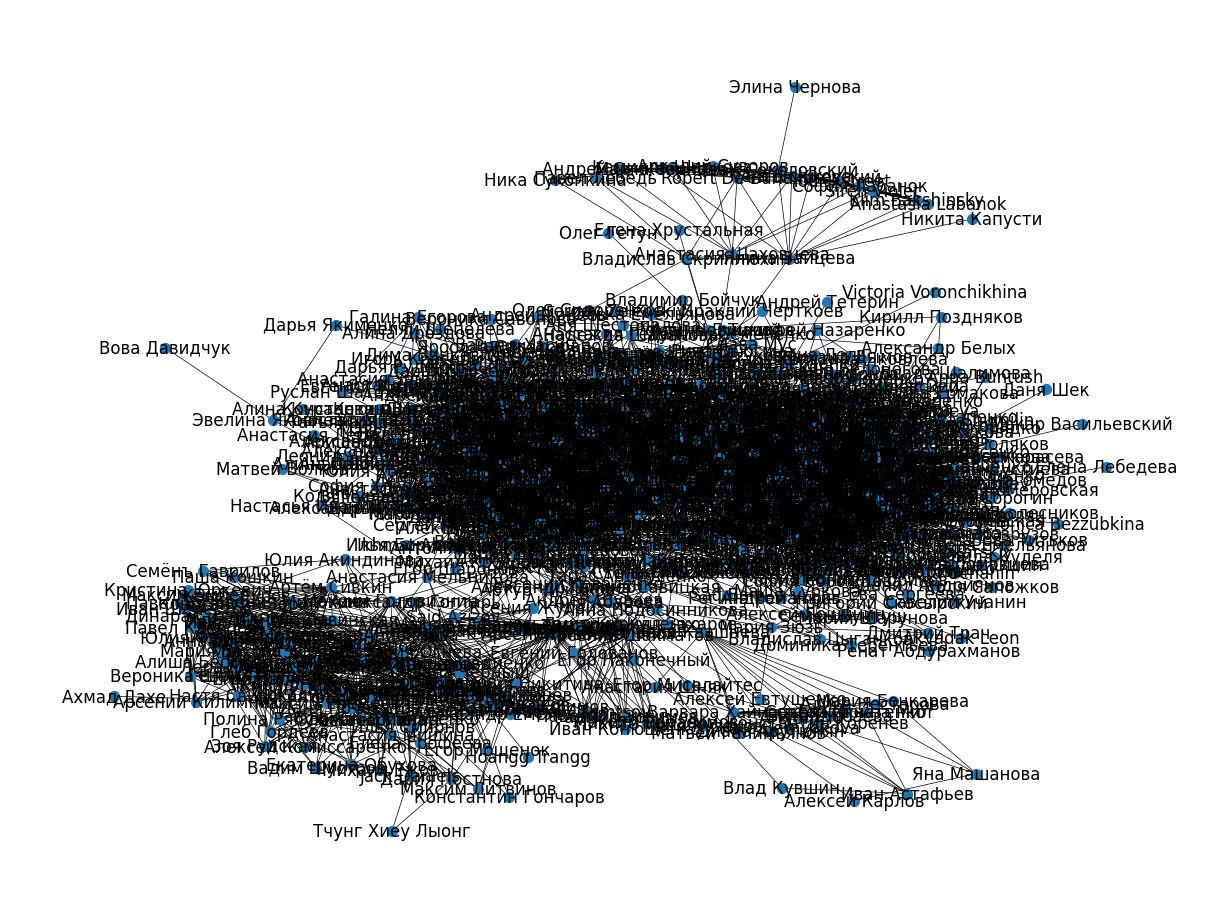

In [17]:
graph_plot()

Кластер снизу слева - друзья из МИСиС <br>
Кластер снизу сверху - друзья с Кипра <br>
По центру все мои друзья из Владивостока (родной город) <br>

# Нанесу друзей на карту

In [18]:
%pip install requests
%pip install clickhouse-driver

Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.5/185.5 kB 2.4 MB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for tzlocal from https://files.pythonhosted.org/packages/84/d2/730a87f0dbf184760394a85088d0d2366a5a8a32bc32ffd869a83f1de854/tzlocal-5.0.1-py3-none-any.whl.metadata
Using cached tzlocal-5.0.1-py3-none-any.whl (20 kB)
Note: you may need to restart the kernel to use updated packages.


In [38]:
my_friends = get_friends(access_token, CENTRAL_USER_ID, with_name=True)
cities = []
for friend in my_friends:
    if friend.get("city"):
        cities.append(friend["city"]["title"])
                      
city_stats = dict(Counter(cities))
unique_cities = list(city_stats.keys())
city_stats, unique_cities

({'Владивосток': 231,
  'Красноярск': 1,
  'Los Angeles': 3,
  'Москва': 106,
  'Limassol': 6,
  'Gayville': 1,
  'New York City': 1,
  'Новосибирск': 3,
  'Чита': 1,
  'Санкт-Петербург': 18,
  'Пенза': 1,
  'Александров': 1,
  'Элиста': 1,
  'Bangkok': 1,
  'Sydney': 1,
  'Набережные Челны': 1,
  'Тарасовка': 1,
  'Vancouver': 2,
  'Фрязино': 1,
  'Белогорск': 1,
  'Springfield': 1,
  'Липецк': 1,
  'Тула': 2,
  'Озерск': 2,
  'Birmingham': 1,
  'Иркутск': 1,
  'Malé': 1,
  'Beograd': 1,
  'Челябинск': 1,
  'Киев': 2,
  'Хабаровск': 3,
  'Биробиджан': 1,
  'Долгопрудный': 1,
  'Спасск-Дальний': 1,
  'Артем': 1,
  'Краснодар': 2,
  'Barcelona': 1,
  'Якутск': 1,
  'Auckland': 1,
  'Воронеж': 1,
  'Satans Kingdom': 1,
  'Дубна': 1,
  'Казань': 2,
  'Минск': 2,
  'Гнилое Болото': 1,
  'Южно-Сахалинск': 1,
  'Таганрог': 1,
  'Томск': 1,
  'Кировский': 1,
  'München': 1,
  'Калининград': 1,
  'Комсомольск-на-Амуре': 1,
  'Larnaca': 1,
  'Чернобыль': 1,
  'Фокино': 1,
  'Елизово': 1,
  'Уфа

In [39]:
API_KEY = 'bfec5630-ac74-46d7-a6ad-b4ecd2dd9e0b'

In [40]:
import requests
from dataclasses import dataclass


@dataclass
class YandexGeocoder:
    api_key: str
    geocoder_url: str = 'https://geocode-maps.yandex.ru/1.x'

    def adress_to_geopoint(self, address: str) -> str:
        """
        Преобразование адреса в геокоординаты в формате Datalens
        """
        response = requests.get(self.geocoder_url, params={
            'apikey': self.api_key,
            'geocode': address,
            'format': 'json',
        })
        response.raise_for_status()

        result = response.json()['response']['GeoObjectCollection']['featureMember']
        if not result:
            return None

        lat, lon = result[0]['GeoObject']['Point']['pos'].split(' ')
        return self._to_datalens_format(lon, lat)
    
    def _to_datalens_format(self, lon, lat):
        return f'[{lon},{lat}]'
        

geocoder = YandexGeocoder(api_key=API_KEY)

In [43]:
encoded_data = []

for adress in tqdm(unique_cities):
    s = eval(geocoder.adress_to_geopoint(adress))
    encoded_data.append(s)

encoded_data

  0%|          | 0/70 [00:00<?, ?it/s]

[[43.115542, 131.885494],
 [56.010569, 92.852572],
 [34.055863, -118.246139],
 [55.755864, 37.617698],
 [34.687014, 33.036281],
 [44.370499, -103.760087],
 [40.714627, -74.002863],
 [55.030204, 82.92043],
 [52.033635, 113.501049],
 [59.938784, 30.314997],
 [53.195042, 45.018316],
 [56.397774, 38.727621],
 [46.307743, 44.269759],
 [13.77137, 100.513782],
 [-33.865255, 151.216484],
 [55.741272, 52.403662],
 [55.959984, 37.825029],
 [49.2846, -123.116894],
 [55.961339, 38.042808],
 [50.921292, 128.473926],
 [37.189573, -93.278193],
 [52.608826, 39.599229],
 [54.193122, 37.617348],
 [55.763189, 60.707608],
 [52.480513, -1.89735],
 [52.289588, 104.280606],
 [4.174972, 73.509688],
 [44.816245, 20.460469],
 [55.159902, 61.402554],
 [50.450441, 30.52355],
 [48.480229, 135.071917],
 [48.78992, 132.924746],
 [55.933302, 37.51423],
 [44.597647, 132.817568],
 [43.353047, 132.180339],
 [45.03547, 38.975313],
 [41.386378, 2.18676],
 [62.027221, 129.732178],
 [-36.851747, 174.762972],
 [51.660781, 39

In [53]:
friends_distribution = pd.DataFrame({
    "city": list(city_stats.keys()),
    "people": list(city_stats.values()),
    "x": [coord[0] for coord in encoded_data],
    "y": [coord[1] for coord in encoded_data]
})

friends_distribution

city  people          x           y
0                Владивосток     231  43.115542  131.885494
1                 Красноярск       1  56.010569   92.852572
2                Los Angeles       3  34.055863 -118.246139
3                     Москва     106  55.755864   37.617698
4                   Limassol       6  34.687014   33.036281
..                       ...     ...        ...         ...
65                 Черемхово       1  53.137327  103.089377
66                 Charlotte       1  35.230601  -80.847190
67                     Уруша       1  54.046571  122.882991
68                     Киров       1  58.603595   49.668023
69  Петропавловск-Камчатский       1  53.024265  158.643503

[70 rows x 4 columns]

In [54]:
friends_distribution.to_csv("friends.csv", index=False)

In [55]:
friends_distribution.dtypes

city       object
people      int64
x         float64
y         float64
dtype: object

## Соединил x и y в кортеж при помощи аггрегации GEOPOINT([x], [y])

https://datalens.yandex/mr8tg9d1fk1eb

# Taks 3

## Спарсить сразу 10к юзеров не выйдет так что я разобью их на чанки с разной датой ождения

In [4]:
all_users = []
num_users = 0
birth_days = range(0, 31)
birth_months = range(0, 12)

for birth_month in tqdm(birth_months):
    for birth_day in birth_days:
        users = vk.users.search(
            city=110, 
            fields="name,sex,bdate", 
            count=1000,
            birth_day=birth_day,
            birth_month=birth_month
        )
        num_users += users["count"]
        all_users.extend(users["items"])

  0%|          | 0/12 [00:00<?, ?it/s]

# Фильтранем юзеров, у которых есть полная дата рождения

In [5]:
filtered_users = [(user["id"], user["first_name"], user["sex"], user["bdate"]) for user in all_users if user.get("bdate") and len(user.get("bdate")) == 10]
filtered_users

[(204709106, 'Полина', 1, '30.12.2001'),
 (615712436, 'Эмма', 1, '11.10.2000'),
 (202275641, 'Варвара', 1, '10.11.2000'),
 (586587950, 'Георгий', 2, '23.10.2003'),
 (290787404, 'リサ', 1, '17.12.1999'),
 (223467561, 'Кирилл', 2, '21.12.2002'),
 (147708028, 'Катя', 1, '17.11.2001'),
 (160721157, 'Анастасия', 1, '29.11.1998'),
 (188976582, 'Даша', 1, '16.12.2002'),
 (202669245, 'Игорь', 2, '30.12.2002'),
 (470316822, 'Кристина', 1, '30.12.2005'),
 (327168522, 'Софья', 1, '23.11.2006'),
 (515388333, 'Иван', 2, '25.10.2005'),
 (17221351, 'Света', 1, '24.11.1992'),
 (485440602, 'Алена', 1, '26.10.1992'),
 (440317557, 'Артём', 2, '21.11.2003'),
 (483131247, 'Nikolas', 2, '18.11.1999'),
 (223207126, 'Александр', 2, '22.10.1998'),
 (697769051, 'Ксения', 1, '10.11.2002'),
 (122060743, 'Елизавета', 1, '20.12.2001'),
 (638205062, 'Милана', 1, '17.12.1909'),
 (706912919, 'Наталья', 1, '18.10.1994'),
 (470840445, 'Ник', 2, '23.12.1999'),
 (582714543, 'Дмитрий', 2, '18.10.1982'),
 (543712696, 'Тим', 2

In [6]:
sampled_users = random.sample([
    (user[0], user[1], user[2], (datetime.now() - datetime.strptime(user[3], '%d.%m.%Y')).days // 365)
    for user in filtered_users], 10_000)
sampled_users

[(44781974, 'Андрей', 2, 40),
 (462066993, 'Михаил', 2, 16),
 (319884927, 'Павел', 2, 70),
 (438723863, 'Александр', 2, 42),
 (435332526, 'Владимир', 2, 25),
 (543712696, 'Тим', 2, 18),
 (90094935, 'Костя', 2, 34),
 (107964363, 'Марианна', 1, 29),
 (429791157, 'Митя', 2, 20),
 (11521152, 'Марина', 1, 32),
 (132975114, 'Серега', 2, 34),
 (329553723, 'Александра', 1, 18),
 (364794917, 'Ольга', 1, 32),
 (672240378, 'Костя', 2, 16),
 (119499214, 'Софья', 1, 22),
 (268039770, 'Карина', 1, 120),
 (710282637, 'Вероника', 1, 33),
 (541129015, 'Ольга', 1, 57),
 (226217372, 'Матвей', 2, 20),
 (23272685, 'Виктория', 1, 34),
 (69730371, 'Роман', 2, 38),
 (33839179, 'Сана', 2, 37),
 (683582127, 'Рахимов', 2, 22),
 (111218621, 'Наташа', 1, 42),
 (139814328, 'Виталий', 2, 51),
 (733524034, 'Дарья', 1, 20),
 (276956386, 'Егор', 2, 20),
 (19715595, 'Александр', 2, 38),
 (3732192, 'Алёна', 1, 33),
 (79236903, 'Диана', 1, 20),
 (464908098, 'Ваня', 2, 26),
 (703156894, 'Дарья', 1, 17),
 (40444750, 'Алекса

In [7]:
len(sampled_users)

10000

## Посчитаю статистику имен

In [8]:
female_names = list(map(lambda x: x[1], filter(lambda x: x[2] == 1, sampled_users)))
male_names = list(map(lambda x: x[1], filter(lambda x: x[2] == 2, sampled_users)))
male_names

['Андрей',
 'Михаил',
 'Павел',
 'Александр',
 'Владимир',
 'Тим',
 'Костя',
 'Митя',
 'Серега',
 'Костя',
 'Матвей',
 'Роман',
 'Сана',
 'Рахимов',
 'Виталий',
 'Егор',
 'Александр',
 'Ваня',
 'Александр',
 'Дмитрий',
 'Семён',
 'Серёжа',
 'Борис',
 'Денис',
 'Алексей',
 'Константин',
 'Максим',
 'Андрей',
 'Макс',
 'Олег',
 'Матвей',
 'Савелий',
 'Петр',
 'Максим',
 'Алексей',
 'Раиль',
 'София',
 'Иван',
 'Влад',
 'Бородатый',
 'Егор',
 'Александр',
 'Игорь',
 'Даня',
 'Константин',
 'Аброр',
 'Павел',
 'Александр',
 'Стёпа',
 'Данир',
 'Данил',
 'Бенджамин',
 'Дмитрий',
 'Артем',
 'Муслим',
 'Пасынков',
 'Дмитрий',
 'Алексей',
 'Павел',
 'Артем',
 'Данила',
 'Инору',
 'Алексей',
 'Андрей',
 'Максим',
 'Дмитрий',
 'Игорь',
 'Александр',
 'Илья',
 'Сергей',
 'Денис',
 'Sergej',
 'Роман',
 'Эво',
 'Игорь',
 'Максим',
 'Данил',
 'Тима',
 'Дмитрий',
 'Никита',
 'Прадед',
 'Денис',
 'Саша',
 'Aza',
 'Женя',
 'Сохибжон',
 'Максим',
 'Сергей',
 'Макар',
 'Александр',
 'Руслан',
 'Александр

In [9]:
male_name_stats =  dict(sorted(list(dict(Counter(male_names)).items()), key=lambda x: x[1], reverse=True))
female_name_stats =  dict(sorted(list(dict(Counter(female_names)).items()), key=lambda x: x[1], reverse=True))

{'Александр': 306,
 'Сергей': 200,
 'Андрей': 193,
 'Алексей': 192,
 'Дмитрий': 183,
 'Михаил': 143,
 'Максим': 123,
 'Никита': 119,
 'Евгений': 98,
 'Иван': 95,
 'Илья': 95,
 'Владимир': 89,
 'Кирилл': 82,
 'Константин': 79,
 'Денис': 70,
 'Игорь': 67,
 'Артём': 66,
 'Егор': 64,
 'Павел': 62,
 'Роман': 61,
 'Данил': 59,
 'Даниил': 58,
 'Антон': 53,
 'Олег': 52,
 'Дима': 51,
 'Николай': 49,
 'Матвей': 46,
 'Виталий': 46,
 'Виктор': 45,
 'Артем': 44,
 'Миша': 44,
 'Юрий': 43,
 'Влад': 41,
 'Владислав': 40,
 'Арсений': 30,
 'Макс': 28,
 'Ваня': 27,
 'Саша': 27,
 'Вячеслав': 27,
 'Анатолий': 26,
 'Руслан': 24,
 'Ярослав': 24,
 'Тимофей': 24,
 'Марк': 24,
 'Вадим': 23,
 'Степан': 20,
 'Костя': 19,
 'Рома': 19,
 'Георгий': 19,
 'Станислав': 19,
 'Василий': 19,
 'Даня': 17,
 'Григорий': 17,
 'Женя': 16,
 'Леонид': 16,
 'Глеб': 16,
 'Валерий': 15,
 'Вова': 14,
 'Тёма': 14,
 'Стас': 14,
 'Семён': 13,
 'Тимур': 13,
 'Слава': 13,
 'Богдан': 11,
 'Лев': 11,
 'Эдуард': 11,
 'Серега': 10,
 'Савелий

In [11]:
male_df = pd.DataFrame(male_name_stats.items(), columns=["name", "count"])
male_df["sex"] = ["male"] * male_df.shape[0]
female_df = pd.DataFrame(female_name_stats.items(), columns=["name", "count"])
female_df["sex"] = ["female"] * female_df.shape[0]

pd.concat([male_df, female_df], axis=0).to_csv("sex_stats.csv", index=False)

## Построю диаграмму

In [41]:
data = pd.DataFrame(
    sampled_users, columns=["id", "name", "sex", "age"]
).drop(labels=["id",], axis=1)
data

name  sex  age
0         Aicha    1   22
1     Александр    2   22
2          해변에서    1   18
3         Мария    1   28
4          Лиза    1   17
...         ...  ...  ...
9995      Антон    2   40
9996     Сириус    2   17
9997      Ирина    1   44
9998      Бобур    2   21
9999       Коля    2   27

[10000 rows x 3 columns]

In [43]:
agg_data = data.groupby(["sex", "age"]).agg("count").reset_index()
agg_data

sex  age  name
0      1   13     2
1      1   14    68
2      1   15   127
3      1   16   183
4      1   17   189
..   ...  ...   ...
185    2  118     6
186    2  119     4
187    2  120    20
188    2  121    24
189    2  122     3

[190 rows x 3 columns]

In [44]:
agg_data.to_csv("city_stats.csv", index=False)

График с распределением по возрастам

https://datalens.yandex/ciioju1cvoky1

# Дашборд со всеми чартами

https://datalens.yandex/qwwcybzjzew6f